Lets say we have
$$
\frac{dX}{dt} = k - \gamma X
$$
and if described as a Markov Process, we would have
$X \rightarrow X + 1$ with rate $k$, and $X \rightarrow X - 1$ with rate $\gamma X$.

Text(0, 0.5, 'Number of X')

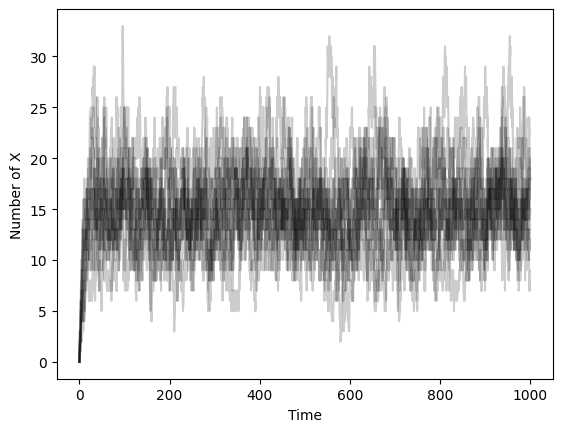

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import random

n_sim = 10
def gillespie(n_sim):
    Xs = []
    ts = []
    for i in range(n_sim):
        X = [0] #X vec
        t = [0] #time vec
        
        t_f = 1000 # End time
        
        k = 1.5
        gamma = 0.1
        """
        Should get an average, or steady-state
        at around k/gamma, so 15
        """
        
        while t[-1] < t_f:
        
            rates = [k, gamma * X[-1]]
            rates_sum = sum(rates)
        
            """
            Stochastic time we are adding
            Drawn from exp dist
            Scale is beta = 1/lambd, and we want lambd
            """
            tau = np.random.exponential(scale = 1/rates_sum)
        
            t.append(t[-1] + tau)
        
            """
            Draw random number from [0,1]
            uniformly
            """
            num = random.uniform(0,1)
        
            if num * rates_sum <= rates[0]:
                X.append(X[-1] + 1)
        
            else:
                X.append(X[-1] - 1)
        
            """
            Eventually might want to add other events
            """
        Xs.append(X)
        ts.append(t)

    return Xs, ts
Xs, ts = gillespie(n_sim)


"""
Bit hard to do average trajectory without interpolation
Will see if can be done
"""
for x, t in zip(Xs, ts):
    plt.plot(t, x, "k", alpha=0.2)  

plt.xlabel("Time")
plt.ylabel("Number of X")